If you are setting up a kernel, use:
 
conda install -c conda-forge nltk pandas numpy matplotlib seaborn scipy wordcloud scattertext scikit-learn regex multidict pyldavis spacy

# 1. Statistics for the dataset [15 pts]

Create a function that receives as input an integer indicating the statistic to plot as follows:
- 0: number of characters
- 1: number of words
- 2: average word length

plottingStatistics( data, 0 )
<img title="numberOfCharacters" src="numberOfCharacters.png" style="width:500px;">

plottingStatistics( data, 1 )
<img title="numberOfWords" src="numberOfWords.png" style="width:500px;">

plottingStatistics( data, 2 )
<img title="averageWordLength" src="averageWordLength.png" style="width:500px;">


In [119]:
#import dependencies
import pandas as pd
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
%matplotlib inline

In [120]:
#wrangle data
data = pd.read_csv('mtsamples.csv')
data['medical_specialty'] = data['medical_specialty'].apply(lambda x: x.strip())
data['medical_specialty'].value_counts()
selectedDiagnosis = ['Cardiovascular / Pulmonary', 'General Medicine', 'Orthopedic', 'Gastroenterology']
filtered_df= data.loc[data['medical_specialty'].isin(selectedDiagnosis)]

In [140]:
#used the example in the notes
#create a function
def plottingStatistics(data, typePlot):
    
    selData = data.loc[data['medical_specialty'].isin(selectedDiagnosis)]

    if typePlot == 0:
        selData['plotInfo'] = selData['description'].apply( lambda x: len(x) )
        xaxis = "number of characters"
    
    elif typePlot== 1:
        selData['plotInfo'] = selData['description'].apply( lambda x: len( x.split(" ") ) )
        xaxis = "number of words"
    
    else:
        selData['plotInfo'] = selData['description'].apply( lambda x : np.mean( [ len(w) for w in  x.split(" ") ] )  )
        xaxis = "average word length"
    
    sns.barplot(data=selData,x="plotInfo", y='medical_specialty')
    
    plt.xlabel("{}".format(xaxis))
    plt.tight_layout()

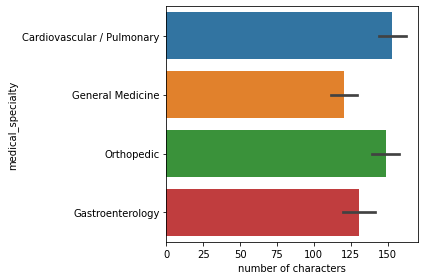

In [141]:
#number of characters
plottingStatistics(data=filtered_df, typePlot=0)

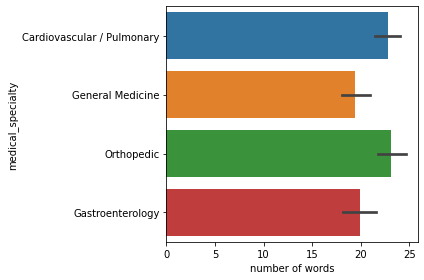

In [137]:
#number of words
plottingStatistics( data=filtered_df, typePlot=1)

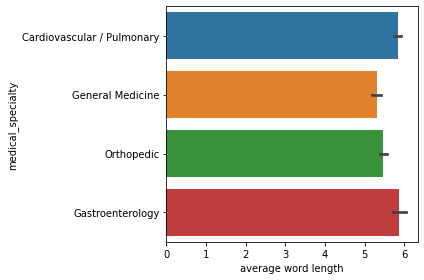

In [142]:
#average word length
plottingStatistics( data=filtered_df, typePlot=2)

# Top words [23 pts]

Process the column 'description' for the medical_specialties ['Orthopedic', 'Gastroenterology', 'General Medicine', 'Cardiovascular / Pulmonary'].

Use stopwords and lemmatize to process the text. Then, use CountVectorizer and TfidfTransformer to find the top 15 bio-grams.

Your plot should look like this:


<img title="tf_idt" src="tf_idt.png" style="width:500px;">


In [11]:
#import dependencies
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [12]:
#nltk.downloads
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marcj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marcj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marcj\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [143]:
stop_words = set(stopwords.words('english'))

In [144]:
from nltk.stem import WordNetLemmatizer
lemmer  = WordNetLemmatizer()
def stopwords_and_lemmatizer(text ):
    # replacing non-alphabetic characters for space
    text = re.sub('[^A-Za-z]', ' ', text)
    # getting individual words
    words = word_tokenize( text.lower() ) 
    # applying the lemmatize function to each word 
    sentence = [ lemmer.lemmatize(w)  for w in words if not w in stop_words ]
    return " ".join(sentence)

In [145]:
filtered_df['description_stopwords_and_lemmatizer']  = filtered_df['description'].apply(lambda x:  stopwords_and_lemmatizer( x ) )

In [146]:
# Labels for classes
labeler = LabelEncoder()
filtered_df['class'] = labeler.fit_transform(filtered_df['medical_specialty'])

In [147]:
#to do
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

listOfWordLists = filtered_df['description_stopwords_and_lemmatizer'].values.tolist()
vectorizer =  CountVectorizer(ngram_range=(2, 2)) #this is what we needed to adjust
X_train_tf = vectorizer.fit_transform(listOfWordLists)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_tf)
X_train_tfidf.shape

(1216, 10279)

C:\Users\marcj\anaconda3\envs\624w8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marcj\anaconda3\envs\624w8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marcj\anaconda3\envs\624w8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marcj\anaconda3\envs\624w8\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Func

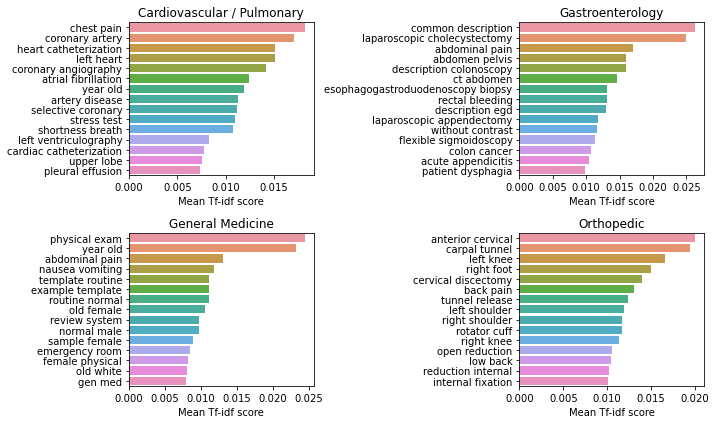

In [148]:
fig, axes= plt.subplots(2, 2, figsize=( 10,6) )

axes = axes.ravel()

for idx, ax in enumerate( axes ):
    
    if idx < 4:
        
        dataClass = X_train_tfidf[ filtered_df['class'] == idx]

        dfTemp = pd.DataFrame(np.mean( dataClass, axis=0).T, index = vectorizer.get_feature_names() )
        
        dfTemp.sort_values(by=[0], ascending = False, inplace=True)
        dfTemp.reset_index( inplace=True )
        topFeat = 15
        sns.barplot( x=dfTemp[0].iloc[:topFeat], y=dfTemp['index'].iloc[:topFeat],  ax=ax)
        
        ax.set_ylabel("")
        ax.set_xlabel("Mean Tf-idf score")
        
        nameClass = filtered_df[ filtered_df['class'] == idx ]['medical_specialty'].iloc[0]
        ax.set_title( nameClass )
    else:
        fig.delaxes( ax)
        
fig.tight_layout()

# Wordcloud [22 pts]

Check this examples of wordcloud https://amueller.github.io/word_cloud/auto_examples/index.html#example-gallery, so that you can produce the following images:

<img title="tf_idt" src="Car.png" style="width:500px;">
<img title="tf_idt" src="Gas.png" style="width:500px;">
<img title="tf_idt" src="Ort.png" style="width:500px;">
<img title="tf_idt" src="Gen.png" style="width:500px;">


Use as mask the image medical.png located in the folder images.

## I wasn't sure if the words size was based on frequency or not so I did it two different ways

### not based on frequency

In [149]:
from wordcloud import WordCloud, STOPWORDS
import multidict as multidict
import numpy as np
import os
import random
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [150]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [151]:
def plot_wordcloud(dataClass, category, target):
    
    stopwords = stop_words 
    words = "".join(dataClass[dataClass['class'] == target]['description_stopwords_and_lemmatizer'].values)
    medical_mask = np.array(Image.open("medical.png"))
    
    plt.figure(figsize = (10, 20))
    wordcloud = WordCloud(stopwords= stopwords, 
                          background_color="black",
                          min_word_length=0,
                          max_words=1000,
                          mask=medical_mask).generate(words)
    
    default_colours= wordcloud.to_array()
    plt.title("WordCloud For {}".format(category))
    plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3))
    plt.axis("off")
    plt.show()  

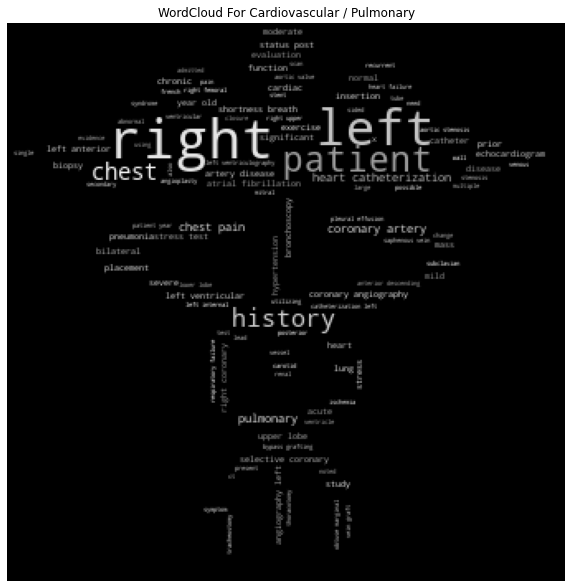

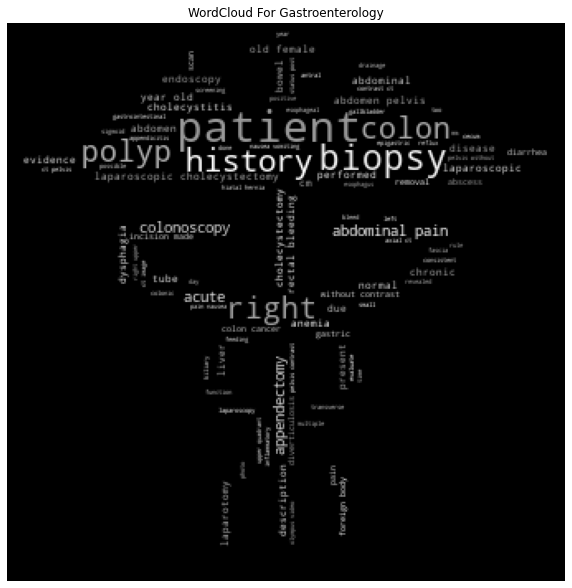

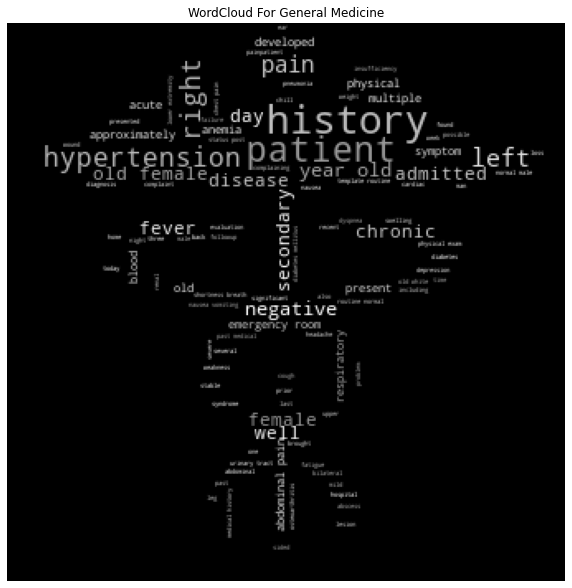

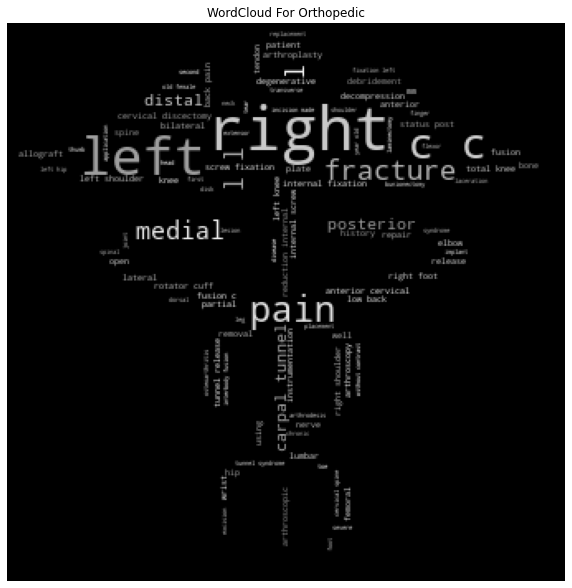

In [152]:
mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))

for selectedDiagnosis, uniqueSent in mapping.items():
    plot_wordcloud(filtered_df, selectedDiagnosis, uniqueSent)

### based on frequency

https://amueller.github.io/word_cloud/auto_examples/frequency.html#sphx-glr-auto-examples-frequency-py

In [153]:
from wordcloud import WordCloud, STOPWORDS
import multidict as multidict
import numpy as np
import os
import re
import random
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [154]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [159]:
def getFrequencyDictForText(sentence):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for text in sentence.split(" "):
        if re.match("a|the|an|the|to|in|for|of|or|by|with|is|on|that|be", text):
            continue
        val = tmpDict.get(text, 0)
        tmpDict[text.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(text):
    medical_mask = np.array(Image.open("medical.png"))
    wc = WordCloud(background_color="black", max_words=1000, mask=medical_mask)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.figure(figsize = (10, 20))
    default_colours= wc.to_array()
    plt.title("WordCloud For {}".format(selectedDiagnosis[i]))
    plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
    plt.axis("off")
    plt.show()

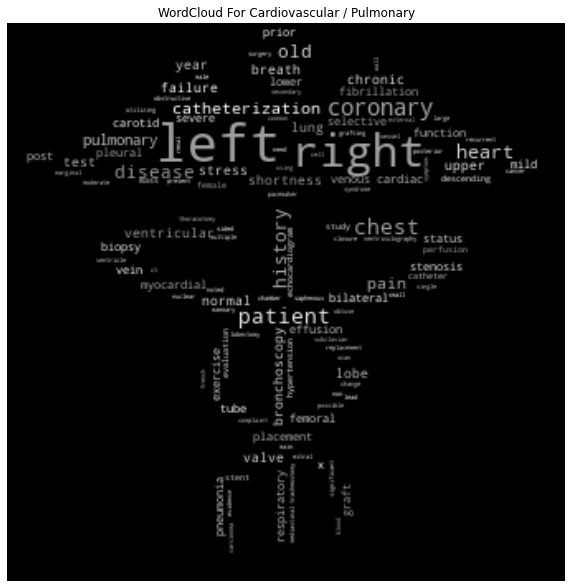

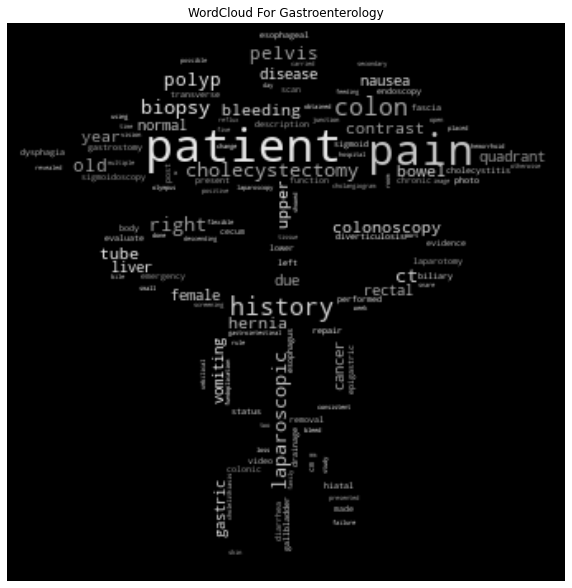

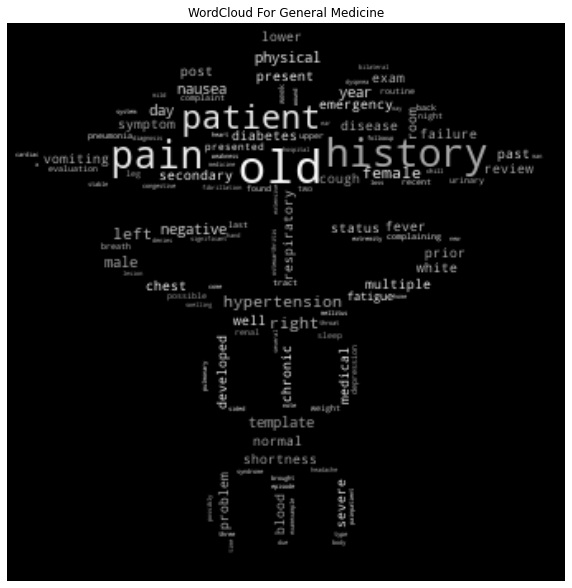

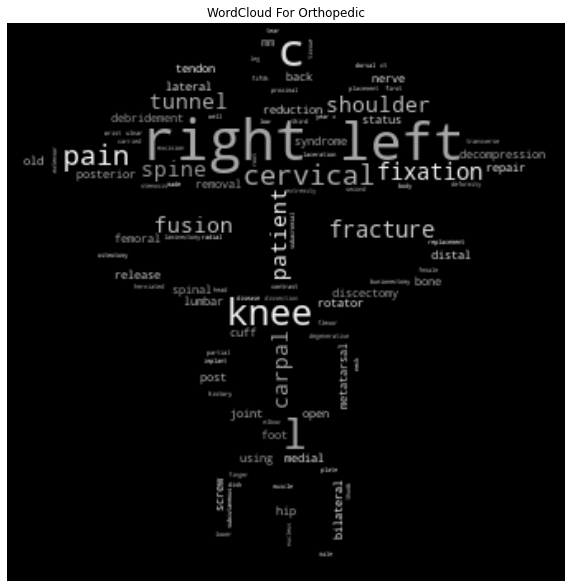

In [164]:
selectedDiagnosis = ['Cardiovascular / Pulmonary', 'Gastroenterology', 'General Medicine', 'Orthopedic']
class_index = [0,1,2,3]

for i in class_index:
    text = "".join(filtered_df[filtered_df['class'] == i]['description_stopwords_and_lemmatizer'].values)
    makeImage(getFrequencyDictForText(text))

# LDA analysis [20pts]

Use the gensim package to generate the LDA for 10 topics. Do the analysis only for the 'Orthopedic', 'Gastroenterology', 'General Medicine', 'Cardiovascular / Pulmonary' medical_specialties.

plottingStatistics( data, 2 )
<img title="LDA" src="que4.png" style="width:700px;">

In [173]:
import gensim
import pyLDAvis
import pyLDAvis.gensim_models

In [174]:
corpus=filtered_df['description_stopwords_and_lemmatizer'].values.tolist()
corpus = [d.split() for d in corpus]

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

#left num_topics as 10 as requested in TA session
#lda model generated by random seed so will be different if you re-run
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                       num_topics = 10,
                                       id2word = dic,
                                       passes = 10,
                                       workers = 2)

In [175]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\marcj\anaconda3\envs\624w8\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.119577 -0.115828       1        1  15.095003
8     -0.159709 -0.095229       2        1  13.795893
3     -0.049452  0.003991       3        1  12.001161
0     -0.040007  0.088315       4        1  11.990512
9      0.127392 -0.056239       5        1  11.087381
4      0.142237 -0.036638       6        1  10.710804
2     -0.143903 -0.061526       7        1   7.829185
5      0.001067  0.113049       8        1   6.764799
1     -0.029504 -0.009736       9        1   6.130682
7      0.032302  0.169841      10        1   4.594580, topic_info=             Term        Freq       Total Category  logprob  loglift
596             c  118.000000  118.000000  Default  30.0000  30.0000
175             l   81.000000   81.000000  Default  29.0000  29.0000
7            left  345.000000  345.000000  Default  28.0000  28.0000
147          knee   70.000000   70.000000  Default  27.0000  27.0000
339      cervical   55.000000   55.000000  Default  26.0000  26.0000
...           ...         ...         ...      ...      ...      ...
2083   ultrasound    2.999956   11.477590  Topic10  -5.5729   1.7385
51           year    4.768115  119.305370  Topic10  -5.1095  -0.1394
342           due    3.347156   19.910825  Topic10  -5.4634   1.2971
2311  colonoscopy    3.562125   35.597309  Topic10  -5.4011   0.7784
1610  ventricular    3.015526   23.583869  Topic10  -5.5677   1.0235

[654 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
2081      2  0.856682    abdomen
2081      3  0.038940    abdomen
2081      6  0.077880    abdomen
1504      1  0.022210  abdominal
1504      2  0.377571  abdominal
...     ...       ...        ...
51        6  0.033527       year
51        7  0.184401       year
51        8  0.025146       year
51        9  0.092200       year
51       10  0.041909       year

[1485 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 4, 1, 10, 5, 3, 6, 2, 8])

# scattertext [20pts]

Use scattertext to explore the word for Surgery vs. Non-Surgery. Use as transformation the function st.Scalers.percentile and a minimum_term_frequency of 20. 

Give five words that are common for Surgery and not for non-surgery. Also, give five common words for the no-surgery that are less frequent in the Surgery class. 

<img title="scatter" src="que5.png" > 

Five words that are common for surgery: **incision, placement, anterior, left, bilateral, right, eye**

Five words that are common not for non-surgery: **ct, back, evaluation, symptoms, hypertension, mri**

Five common words for the non-surgery that are less frequent in the surgery class: **followup, consultation, contrast, without constrast, emergency room, negative, month**

In [32]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [176]:
import nltk
from nltk.corpus import stopwords
import re
import scattertext as st
import spacy
from IPython.display import IFrame

In [177]:
stop_words = set(stopwords.words('english'))
def remove_Stopwords(text ):
    # replacing non-alphabetic characters for space
    text = re.sub('[^A-Za-z]', ' ', text)
    # getting individual words
    words = word_tokenize( text.lower() ) 
    # removing those 
    sentence = [w for w in words if not w in stop_words ]
    return " ".join(sentence)

In [178]:
data = pd.read_csv('mtsamples.csv')
data['medical_specialty'] = data['medical_specialty'].apply(lambda x: x.strip() )
data['description_stopwords']  = data['description'].apply(lambda x:  remove_Stopwords( x ) )
nlp = spacy.load("en_core_web_sm")
data['parsed'] = data['description_stopwords'].apply(nlp)
data['binaryClass'] = data['medical_specialty'].apply(lambda x: 'Surgery' if x =="Surgery" else 'No Surgery' )

In [179]:
corpus = st.CorpusFromParsedDocuments(data, category_col='binaryClass', parsed_col='parsed').build()

In [180]:
html = st.produce_scattertext_explorer(corpus,
                                       category='Surgery',
                                       category_name='Surgery',
                                       not_category_name='No Surgery',
                                       width_in_pixels=1000,
                                       transform=st.Scalers.percentile,
                                       minimum_term_frequency=20,
                                       metadata=data['binaryClass'])
                                       
file_name = 'test.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1200, height=700)